In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
url ="https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',  # <--- Uses Information Gain/Entropy
    random_state=42
)
rf_model.fit(X_train, y_train)
RandomForestClassifier(random_state=42)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [14]:
last_tree = rf_model.estimators_[-1]
print(last_tree)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=134489564)


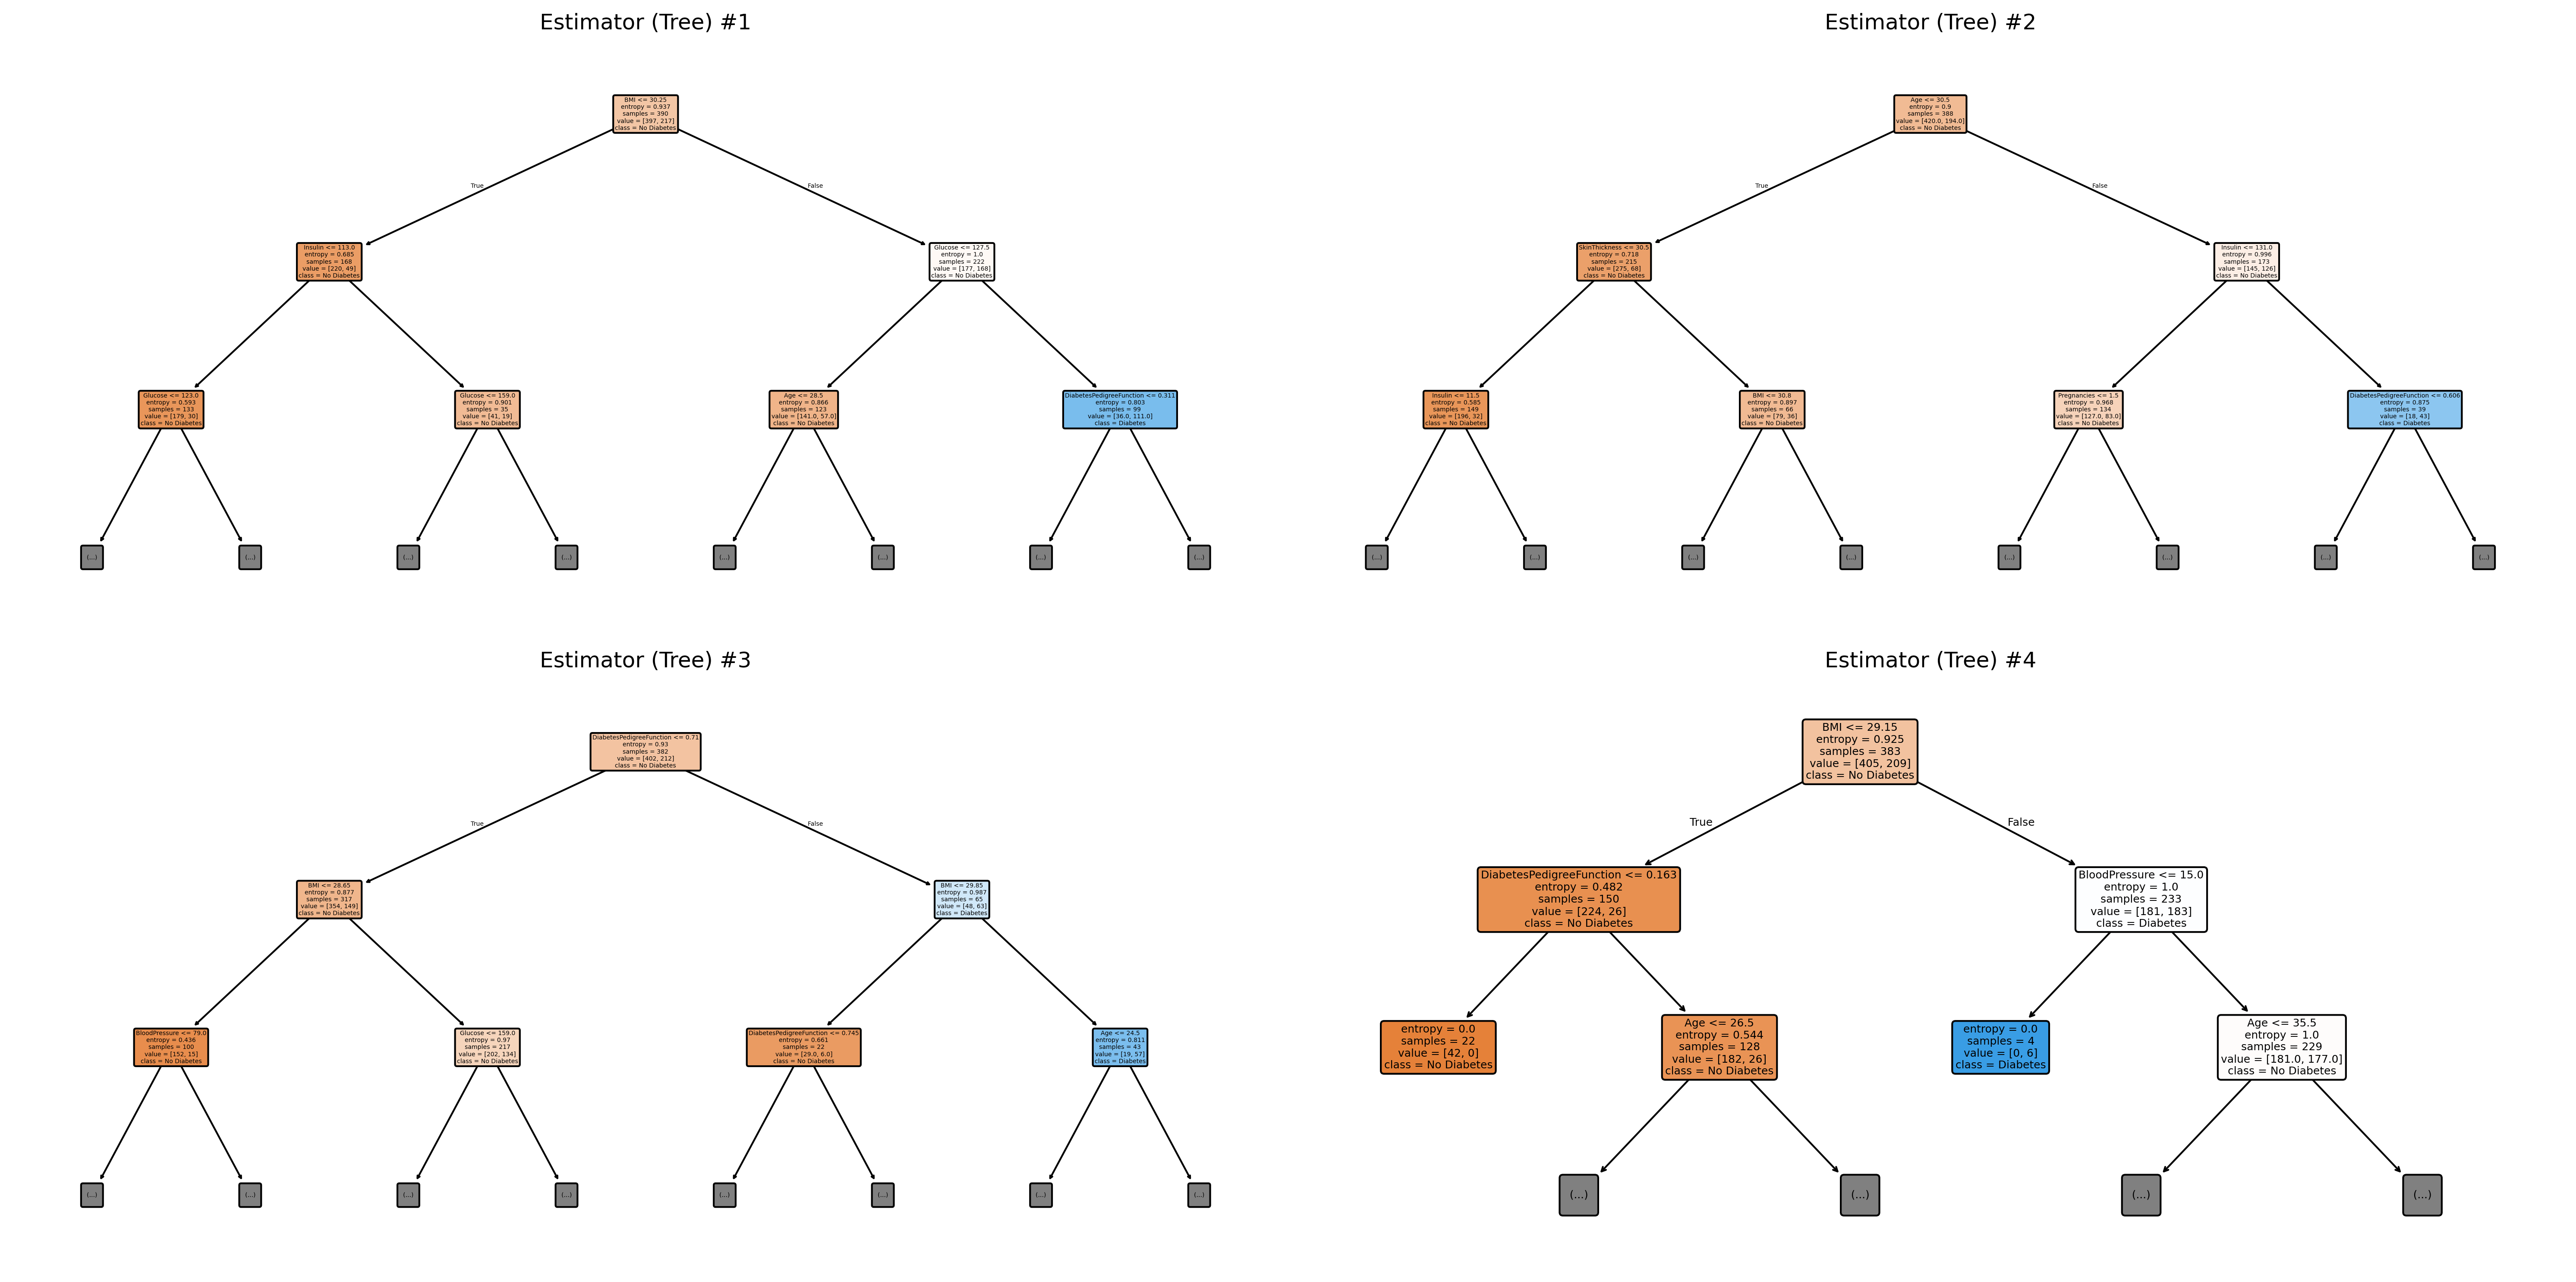

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), dpi=300)

for index in range(0, 4):
    row = index // 2
    col = index % 2
    plot_tree(
        rf_model.estimators_[index],
        feature_names=X.columns,
        class_names=["No Diabetes", "Diabetes"],
        filled=True,
        rounded=True,
        max_depth=2, # Limits depth to keep the diagram readable
        ax=axes[row, col]
    )
    axes[row, col].set_title(f"Estimator (Tree) #{index+1}", fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
import pickle
# Save trained model
with open("rf.pkl", "wb") as file:
 pickle.dump(rf_model, file)
from google.colab import files
files.download('rf.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>